# Problem Statement
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow in Australia.

# About the Dataset
The dataset is taken from Kaggle and contains about 10 years of daily weather observations from many locations across Australia.

Dataset Description:

Number of columns: 23

Number of rows: 145460

Number of Independent Columns: 22

Number of Dependent Column: 1

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Preprocessing

In [4]:
#Separating predictor and target variable
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [5]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [6]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [7]:
col_names = X.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are missing values in many columns as Non-Null Count is less for many rows.

In [9]:
#Descriptive Statistics for the dataset

X.describe(exclude=[object]).T #Numerical features

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [10]:
X.describe(include=[object]).T #Categorical features

,count,unique,top,freq
Date,145460,3436,2014-11-23,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319


Cardinality: The number of unique values in each categorical feature is known as cardinality.
This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.
Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [11]:
#Feature Engineering of Date column to decrease high cardinality:
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

#Drop  Date column
X.drop('Date', axis = 1, inplace = True)

X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


In [12]:
#To check missing values in categorical features
categorical_features = [column_name for column_name in X.columns if X[column_name].dtype == 'O']
X[categorical_features].isnull().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [13]:
#Imputing missing values using the most frequent value that is Mode
categorical_features_with_null = [feature for feature in categorical_features if X[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = X[each_feature].mode()[0]
    X[each_feature].fillna(mode_val,inplace=True)

In [14]:
X[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

EDA Categorical features

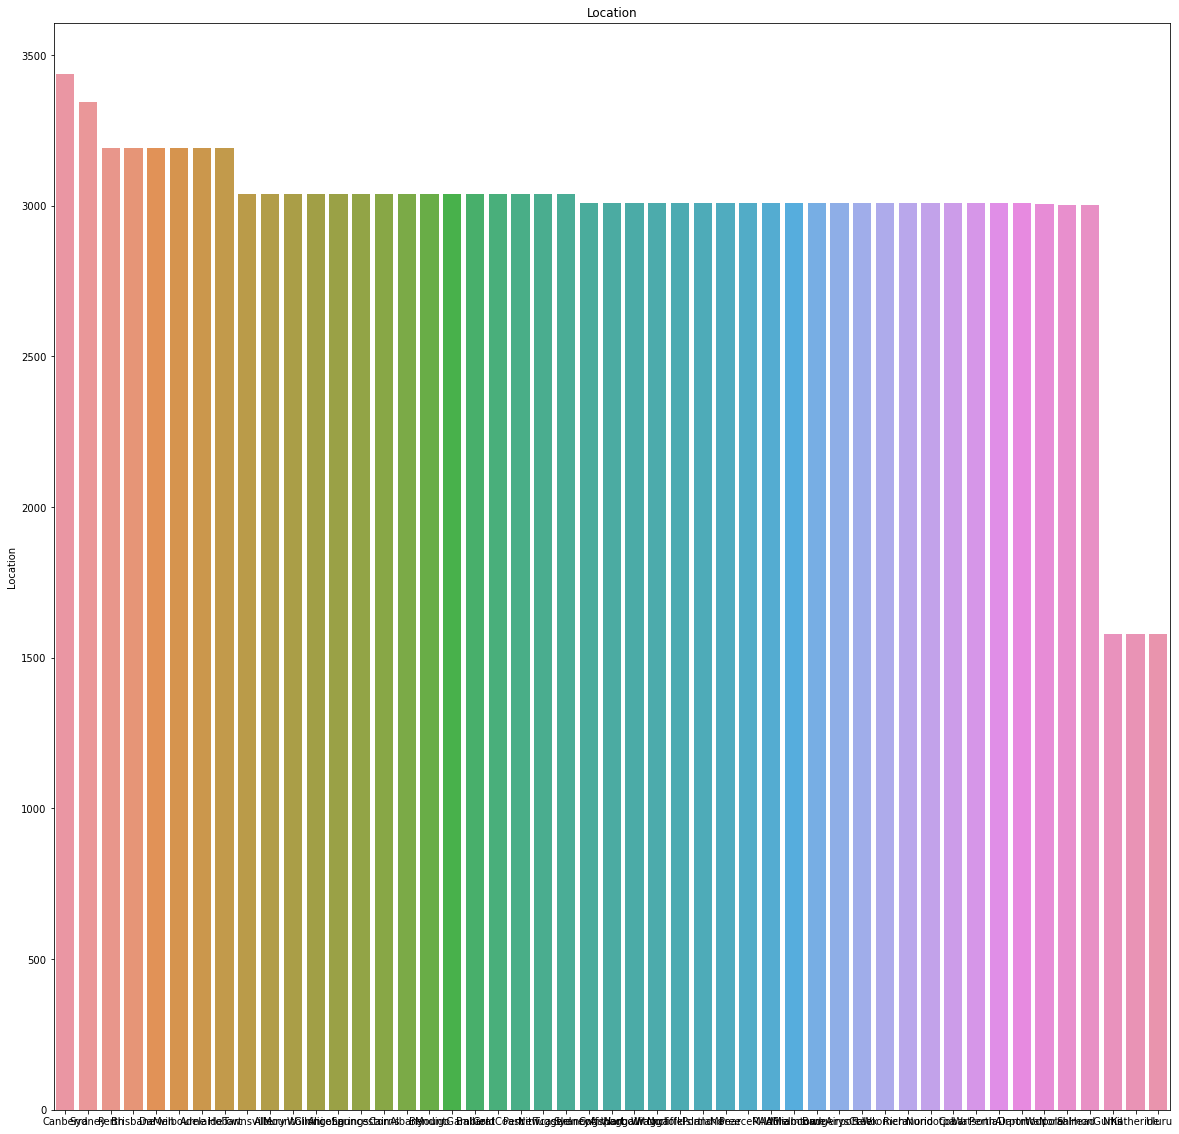

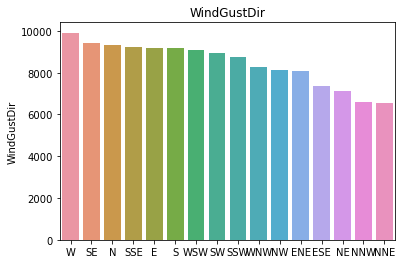

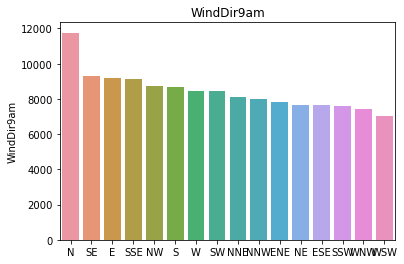

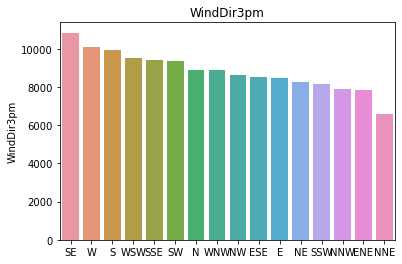

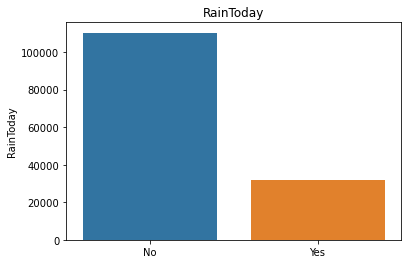

In [15]:
plt.subplots(figsize=(20, 20))
for i in df[categorical_features]:
    sns.barplot(df[categorical_features][i].value_counts().index,df[categorical_features][i].value_counts()).set_title(i)
    plt.show()

Checking and handling MISSING VALUES in numerical features 

In [16]:
numerical_features = [column_name for column_name in X.columns if X[column_name].dtype != 'O']
X[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [17]:
#Percentage of missing values
for column_name in numerical_features:
    if X[column_name].isnull().mean()>0:
        print(column_name, round(X[column_name].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0087
Rainfall 0.0224
Evaporation 0.4317
Sunshine 0.4801
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0182
Humidity3pm 0.031
Pressure9am 0.1036
Pressure3pm 0.1033
Cloud9am 0.3842
Cloud3pm 0.4081
Temp9am 0.0121
Temp3pm 0.0248


In [18]:
#Imputing missing values using Median
numerical_features_with_null = [feature for feature in numerical_features if X[feature].isnull().sum()]
for each_feature in numerical_features_with_null:
    median_val = X[each_feature].median()
    X[each_feature].fillna(median_val,inplace=True)

In [19]:
X[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

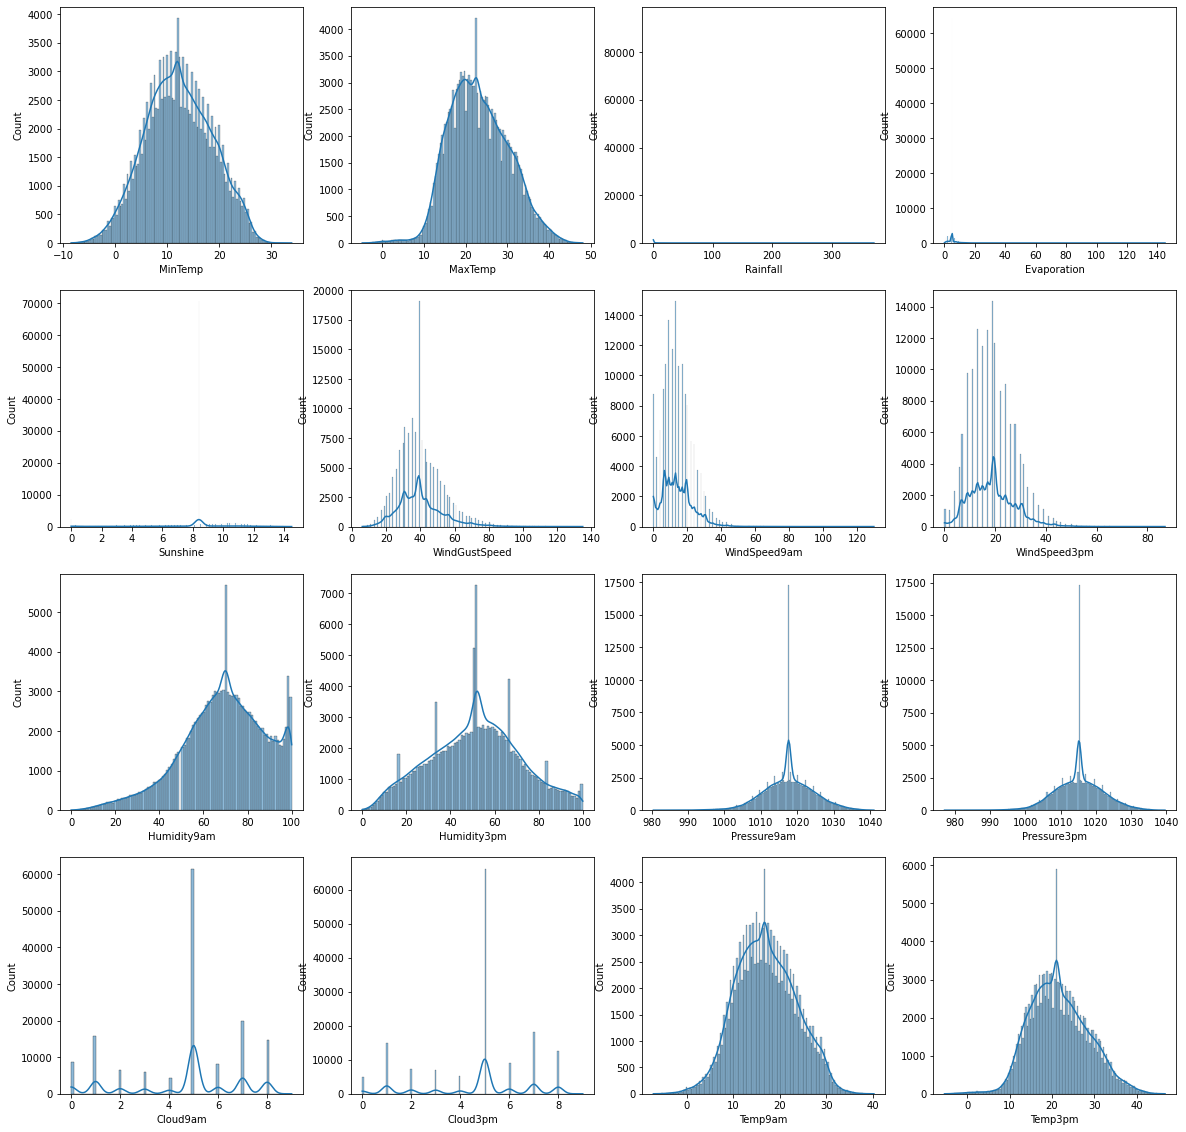

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
sns.histplot(data=X, x="MinTemp", kde=True, ax=axs[0, 0])
sns.histplot(data=X, x="MaxTemp", kde=True, ax=axs[0, 1])
sns.histplot(data=X, x="Rainfall", kde=True, ax=axs[0, 2])
sns.histplot(data=X, x="Evaporation", kde=True, ax=axs[0, 3])
sns.histplot(data=X, x="Sunshine", kde=True, ax=axs[1, 0])
sns.histplot(data=X, x="WindGustSpeed", kde=True, ax=axs[1, 1])
sns.histplot(data=X, x="WindSpeed9am", kde=True, ax=axs[1, 2])
sns.histplot(data=X, x="WindSpeed3pm", kde=True, ax=axs[1, 3])
sns.histplot(data=X, x="Humidity9am", kde=True, ax=axs[2, 0])
sns.histplot(data=X, x="Humidity3pm", kde=True, ax=axs[2, 1])
sns.histplot(data=X, x="Pressure9am", kde=True, ax=axs[2, 2])
sns.histplot(data=X, x="Pressure3pm", kde=True, ax=axs[2, 3])
sns.histplot(data=X, x="Cloud9am", kde=True, ax=axs[3, 0])
sns.histplot(data=X, x="Cloud3pm", kde=True, ax=axs[3, 1])
sns.histplot(data=X, x="Temp9am", kde=True, ax=axs[3, 2])
sns.histplot(data=X, x="Temp3pm", kde=True, ax=axs[3, 3])

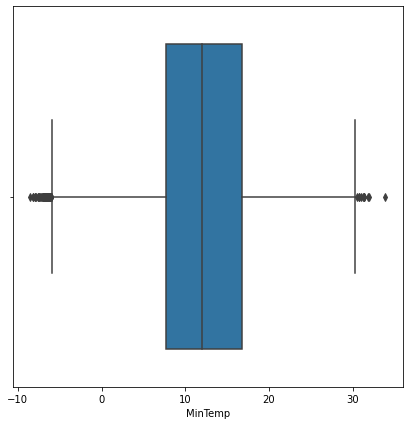

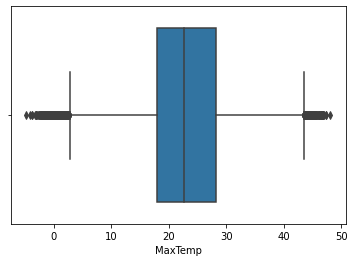

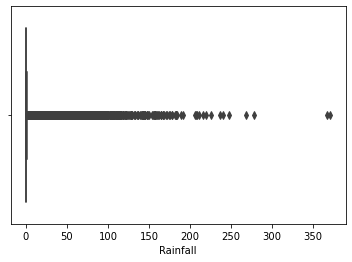

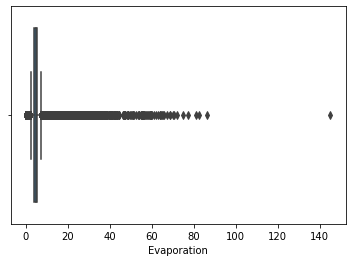

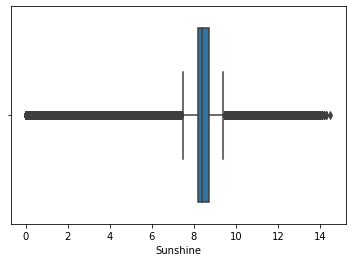

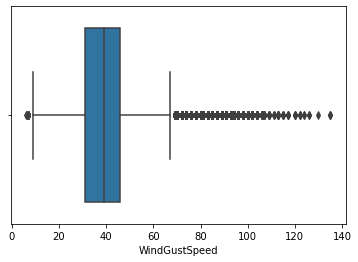

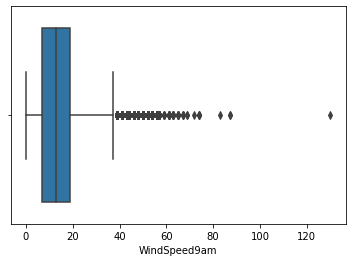

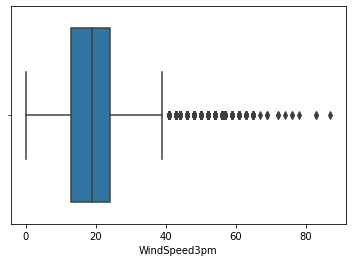

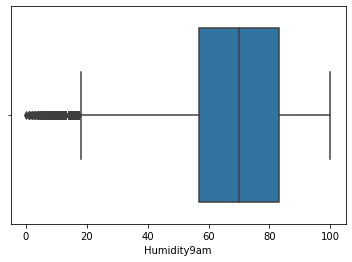

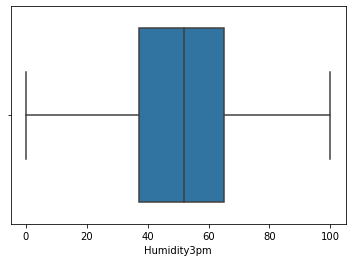

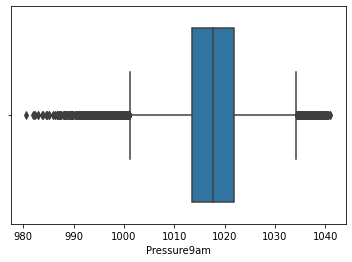

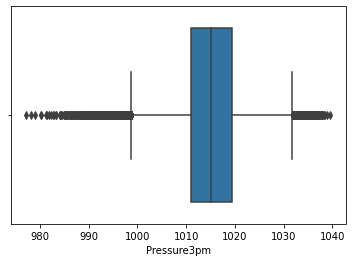

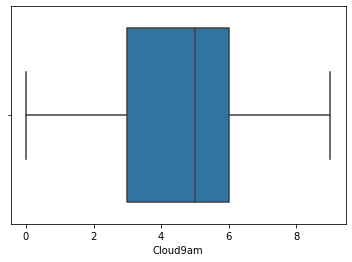

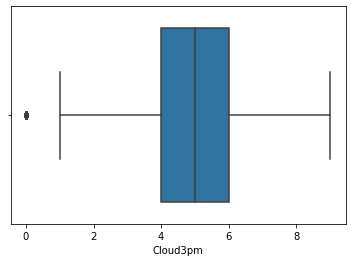

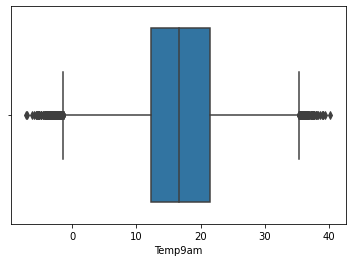

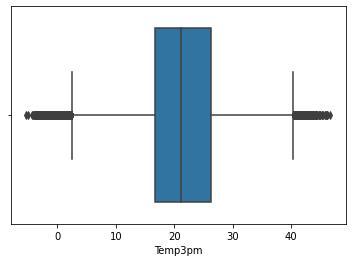

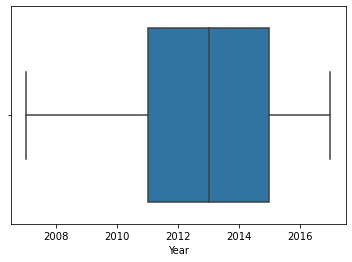

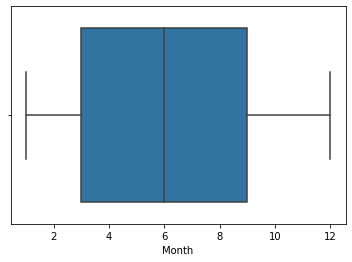

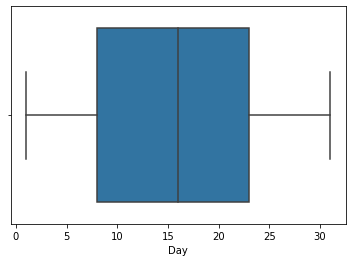

In [21]:
#Checking for outliers using boxplot
plt.figure(figsize=(7,7))
for feature in numerical_features:
    sns.boxplot(X[feature])
    plt.show()

We can see that the variables are skewed. So, I will use interquantile range to find outliers.

In [22]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = X[feature].quantile(0.25)
    q3 = X[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    print('Outliers for {} are values < {} and > {}. The minimum and maximum values are {} and {}\n'.format(feature, lower_limit, upper_limit, min(X[feature]), max(X[feature])))

Outliers for MinTemp are values < -5.950000000000002 and > 30.450000000000003. The minimum and maximum values are -8.5 and 33.9

Outliers for MaxTemp are values < 2.700000000000001 and > 43.5. The minimum and maximum values are -4.8 and 48.1

Outliers for Rainfall are values < -0.8999999999999999 and > 1.5. The minimum and maximum values are 0.0 and 371.0

Outliers for Evaporation are values < 2.1999999999999997 and > 7.0. The minimum and maximum values are 0.0 and 145.0

Outliers for WindGustSpeed are values < 8.5 and > 68.5. The minimum and maximum values are 6.0 and 135.0

Outliers for WindSpeed9am are values < -11.0 and > 37.0. The minimum and maximum values are 0.0 and 130.0

Outliers for WindSpeed3pm are values < -3.5 and > 40.5. The minimum and maximum values are 0.0 and 87.0

Outliers for Humidity9am are values < 18.0 and > 122.0. The minimum and maximum values are 0.0 and 100.0

Outliers for Pressure9am are values < 1001.0500000000001 and > 1034.25. The minimum and maximum val

The outliers in the variable columns 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' need to be removed. Hence, the next step is to impute these values with lower and upper bracket.

In [23]:
for feature in ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    q1 = X[feature].quantile(0.25)
    q3 = X[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    X.loc[X[feature]<lower_limit,feature] = lower_limit
    X.loc[X[feature]>upper_limit,feature] = upper_limit

In [24]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.192053,6.365780,-8.5,7.7,12.0,16.8,33.9
MaxTemp,145460.0,23.215962,7.088358,-4.8,18.0,22.6,28.2,48.1
Rainfall,145460.0,0.381674,0.608638,0.0,0.0,0.0,0.6,1.5
Evaporation,145460.0,4.750932,1.454089,2.2,4.0,4.8,5.2,7.0
Sunshine,145460.0,7.989889,2.757790,0.0,8.2,8.4,8.7,14.5
WindGustSpeed,145460.0,39.643280,12.175910,8.5,31.0,39.0,46.0,68.5
WindSpeed9am,145460.0,13.939757,8.555976,0.0,7.0,13.0,19.0,37.0
WindSpeed3pm,145460.0,18.583126,8.442404,0.0,13.0,19.0,24.0,40.5
Humidity9am,145460.0,68.901251,18.855360,0.0,57.0,70.0,83.0,100.0
Humidity3pm,145460.0,51.553396,20.471345,0.0,37.0,52.0,65.0,100.0


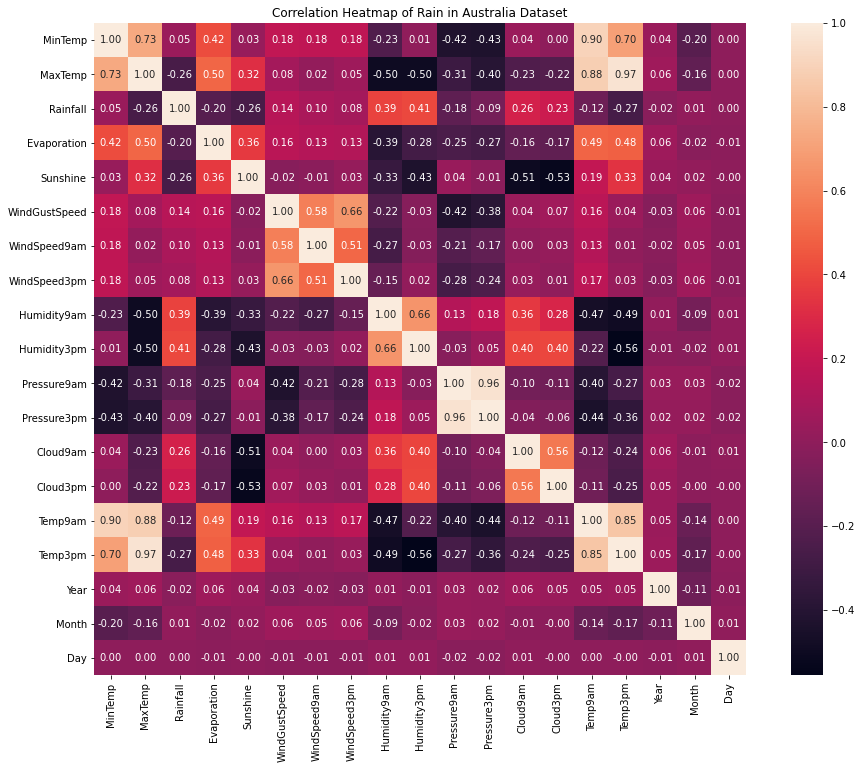

In [25]:
#Correlations among numerical features
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
sns.heatmap(X[numerical_features].corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

Encoding categorical variables

In [26]:
X['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
X['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

In [34]:
X = pd.get_dummies(data = X, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first = True)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0
145458,7.8,27.0,0.0,4.8,8.4,28.0,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Exploring target variable
y.unique()

array(['No', 'Yes', nan], dtype=object)

In [37]:
y.isnull().sum()

3267

In [47]:
mode_val = y.mode()[0]
y.fillna(mode_val,inplace=True)

In [50]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
y.value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [52]:
y.value_counts()/len(df)

No     0.780854
Yes    0.219146
Name: RainTomorrow, dtype: float64

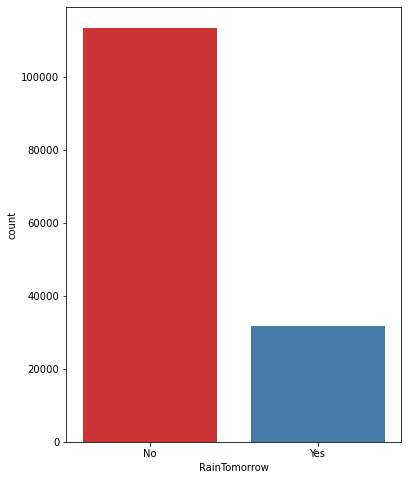

In [53]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x=y, data=y, palette="Set1")
plt.show()

In [57]:
#Encoding target variable
y.replace({'No':0, 'Yes': 1}, inplace = True)
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

Splitting data into train and test data

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train.shape, X_test.shape

((116368, 113), (29092, 113))

Feature Scaling

In [65]:
cols = X_train.columns

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [70]:
#Converting numpy array to pandas dataframe

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [74]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.255072,0.530869,0.550516,0.519359,0.376858,0.459355,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.406023,0.302575,0.190458,0.202964,0.231313,0.208488,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.375000,0.565517,0.375000,0.189189,0.320988,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.541667,0.579310,0.508333,0.351351,0.469136,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.400000,0.625000,0.593103,0.625000,0.513514,0.592593,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [75]:
#Logistic Regression model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)

#Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [76]:
#Predict results on test set
y_pred_log = logreg.predict(X_test)
y_pred_log

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no rain and 1 is for probability of rain.

In [77]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.76907565, 0.72084811, 0.78875948, ..., 0.45180641, 0.62779407,
       0.97001572])

In [78]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.23092435, 0.27915189, 0.21124052, ..., 0.54819359, 0.37220593,
       0.02998428])

In [ ]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier()

# Accuracy Score

In [81]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))

Model accuracy score: 0.8482


In [85]:
print("Train Data Score: {0:0.4f}".format(logreg.score(X_train, y_train)))
print("Test Data Score: {0:0.4f}".format(logreg.score(X_test, y_test)))

Train Data Score: 0.8483
Test Data Score: 0.8482


The accuracy score of training and testing data is comparable and almost equal. So, this confirms absence of underfitting and overfitting.

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix:
 [[21533  1193]
 [ 3224  3142]]

True Positives(TP) =  21533

True Negatives(TN) =  3142

False Positives(FP) =  1193

False Negatives(FN) =  3224


<AxesSubplot:>

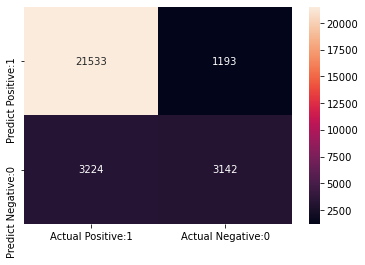

In [110]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.72      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [124]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [131]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.8482
Classification error : 0.1518


In [132]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print f1-score

f1_score = 2*(precision*recall)/(precision + recall)

print('f1-Score : {0:0.4f}'.format(f1_score))

Precision : 0.9475
Recall or Sensitivity : 0.8698
f1-Score : 0.9070


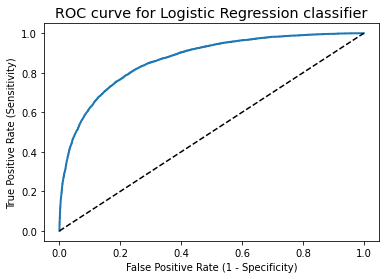

In [112]:
#ROC Curve

y_pred_log1 = logreg.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_log1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Logistic Regression classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [113]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_log1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8671


In [114]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8674


# Feature Importance

Feature: 0, Score: 0.69245
Feature: 1, Score: -2.59765
Feature: 2, Score: 0.71876
Feature: 3, Score: 0.07850
Feature: 4, Score: -1.59291
Feature: 5, Score: 3.43538
Feature: 6, Score: -0.27011
Feature: 7, Score: -0.79877
Feature: 8, Score: 0.36930
Feature: 9, Score: 5.62770
Feature: 10, Score: 6.06070
Feature: 11, Score: -9.86475
Feature: 12, Score: -0.03953
Feature: 13, Score: 1.08898
Feature: 14, Score: 0.98861
Feature: 15, Score: 1.29700
Feature: 16, Score: -0.08464
Feature: 17, Score: 0.11001
Feature: 18, Score: 0.10641
Feature: 19, Score: -0.01693
Feature: 20, Score: -0.46843
Feature: 21, Score: 0.01489
Feature: 22, Score: -0.62749
Feature: 23, Score: -0.27208
Feature: 24, Score: -0.84194
Feature: 25, Score: -0.31825
Feature: 26, Score: -0.09260
Feature: 27, Score: -0.49943
Feature: 28, Score: -0.39634
Feature: 29, Score: -0.13115
Feature: 30, Score: -0.47797
Feature: 31, Score: -0.46065
Feature: 32, Score: -0.95898
Feature: 33, Score: -0.69629
Feature: 34, Score: -1.03804
Feature:

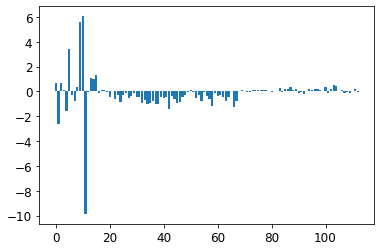

In [117]:
# logistic regression for feature importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Cross Validation

In [118]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8488442  0.84695368 0.84918794 0.84953167 0.85142219 0.84772708
 0.83999313 0.84893014 0.84891715 0.84857339]


In [119]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8480


# Hyperparameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.1, 1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [121]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8480


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [122]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8482
